
Model Performance Metrics:
Mean Absolute Error (MAE): 5874.31
Root Mean Squared Error (RMSE): 6495.82
R² Score: 1.00


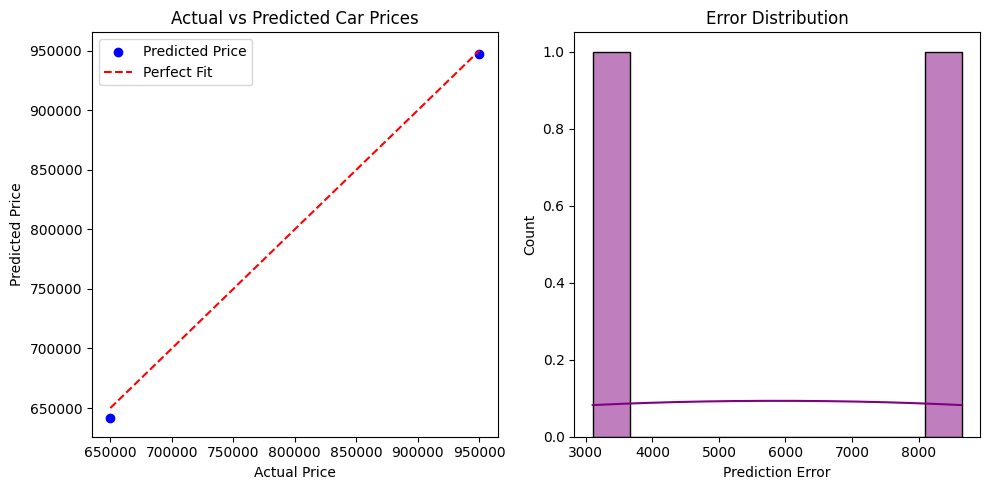

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample dataset
data = {
    'Brand': ['Toyota', 'BMW', 'Ford', 'Honda', 'Mercedes', 'Hyundai', 'Audi', 'Chevrolet', 'Nissan', 'Kia'],
    'Year': [2015, 2018, 2020, 2012, 2016, 2019, 2013, 2017, 2014, 2021],
    'Mileage': [50000, 30000, 20000, 70000, 45000, 25000, 80000, 35000, 60000, 15000],
    'Horsepower': [130, 250, 180, 140, 220, 200, 190, 160, 170, 280],
    'Fuel Type': ['Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel'],
    'Transmission': ['Manual', 'Automatic', 'Manual', 'Automatic', 'Manual', 'Automatic', 'Manual', 'Automatic', 'Manual', 'Automatic'],
    'Engine Size': [1.6, 2.0, 1.2, 2.5, 1.8, 2.2, 1.4, 2.0, 1.5, 2.0],
    'Price': [700000, 950000, 1100000, 500000, 750000, 1020000, 600000, 870000, 650000, 1200000]
}

df = pd.DataFrame(data)

# Encoding categorical variables
encoder = LabelEncoder()
df['Brand'] = encoder.fit_transform(df['Brand'])
df['Fuel Type'] = encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = encoder.fit_transform(df['Transmission'])

# Splitting features and target
X = df[['Brand', 'Year', 'Mileage', 'Horsepower', 'Fuel Type', 'Transmission', 'Engine Size']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization
plt.figure(figsize=(10, 5))

# Actual vs Predicted Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', label="Predicted Price")
plt.plot(y_test, y_test, color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()

# Error Distribution
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=10, kde=True, color='purple')
plt.xlabel("Prediction Error")
plt.title("Error Distribution")

plt.tight_layout()
plt.show()
